In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
salary_data = pd.read_csv('salary_data_states.csv')

In [54]:
avg_salaries = salary_data.groupby('JOB_TITLE_SUBGROUP').mean()['PAID_WAGE_PER_YEAR']

In [55]:
print (avg_salaries)

JOB_TITLE_SUBGROUP
assistant professor       94876.713707
attorney                 146413.596714
business analyst          71300.079566
data analyst              70030.078688
data scientist           108021.038248
management consultant    108251.334662
software engineer         92505.303013
teacher                   46039.985507
Name: PAID_WAGE_PER_YEAR, dtype: float64


In [85]:
avg_salaries = avg_salaries.fillna(0)

In [141]:
data_analyst_salary = avg_salaries.filter(like='data analyst')
data_scientist_salary = avg_salaries.filter(like='data scientist')
business_analyst_salary = avg_salaries.filter(like='business analyst')
software_engineer_salary = avg_salaries.filter(like='software engineer')

In [142]:
print(data_analyst_salary,data_scientist_salary,business_analyst_salary, software_engineer_salary)

JOB_TITLE_SUBGROUP
data analyst    70030.078688
Name: PAID_WAGE_PER_YEAR, dtype: float64 JOB_TITLE_SUBGROUP
data scientist    108021.038248
Name: PAID_WAGE_PER_YEAR, dtype: float64 JOB_TITLE_SUBGROUP
business analyst    71300.079566
Name: PAID_WAGE_PER_YEAR, dtype: float64 JOB_TITLE_SUBGROUP
software engineer    92505.303013
Name: PAID_WAGE_PER_YEAR, dtype: float64


In [144]:
salaries = [data_analyst_salary, data_scientist_salary, business_analyst_salary, software_engineer_salary]
jobs = ['Data Analyst', 'Data Scientist', 'Business Analyst', 'Software Engineer']

In [145]:
data_analyst_salary = data_analyst_salary.sort_values(ascending=False)
data_scientist_salary = data_scientist_salary.sort_values(ascending=False)
business_analyst_salary = business_analyst_salary.sort_values(ascending=False)
software_engineer_salary = software_engineer_salary.sort_values(ascending=False)

In [178]:
print("Average Salary for Data Analysts:")
print(data_analyst_salary)
print("\nAverage Salary for Data Scientists:")
print(data_scientist_salary)
print("\nAverage Salary for Business Analyst:")
print(business_analyst_salary)
print("\nAverage Salary for Software Enigneer:")
print(software_engineer_salary)

Average Salary for Data Analysts:
      Job Title  Salary
0  Data Analyst   70030

Average Salary for Data Scientists:
        Job Title  Salary
1  Data Scientist  108021

Average Salary for Business Analyst:
          Job Title  Salary
2  Business Analyst   71300

Average Salary for Software Enigneer:
           Job Title  Salary
3  Software Engineer   92505


In [179]:
salaries = pd.concat([data_analyst_salary, data_scientist_salary, business_analyst_salary, software_engineer_salary], axis=1)

In [180]:
jobs = ['Data Analyst', 'Data Scientist', 'Business Analyst']
salaries = [data_analyst_salary, data_scientist_salary, business_analyst_salary]

In [182]:
avg_salaries = pd.DataFrame({
    'Job Title': ['Data Analyst', 'Data Scientist', 'Business Analyst', 'Software Engineer'],
    'Salary': [70030, 108021, 71300, 92505]
})

In [183]:
data_analyst_salary = avg_salaries[avg_salaries['Job Title'].str.contains('Data Analyst')]
data_scientist_salary = avg_salaries[avg_salaries['Job Title'].str.contains('Data Scientist')]
business_analyst_salary = avg_salaries[avg_salaries['Job Title'].str.contains('Business Analyst')]
software_engineer_salary = avg_salaries[avg_salaries['Job Title'].str.contains('Software Engineer')]

In [184]:
salary_table = pd.concat([data_analyst_salary, data_scientist_salary, business_analyst_salary, software_engineer_salary])
salary_table.reset_index(drop=True, inplace=True)

In [364]:
print(salary_table)
salary_table.head()

           Job Title  Salary
0       Data Analyst   70030
1     Data Scientist  108021
2   Business Analyst   71300
3  Software Engineer   92505


,Job Title,Salary
0,Data Analyst,70030
1,Data Scientist,108021
2,Business Analyst,71300
3,Software Engineer,92505


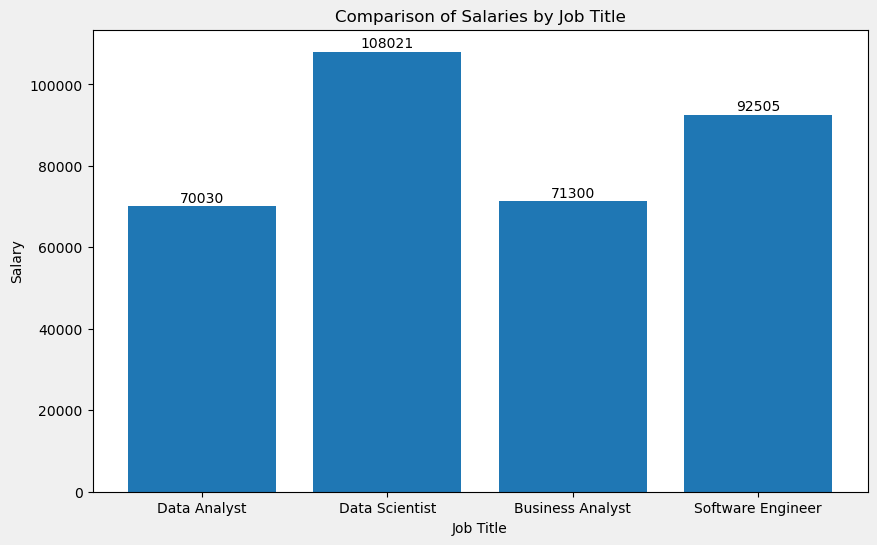

In [334]:
labels = ['Data Analyst', 'Data Scientist', 'Business Analyst', 'Software Engineer']
values = [data_analyst_salary['Salary'].values[0],
          data_scientist_salary['Salary'].values[0],
          business_analyst_salary['Salary'].values[0],
          software_engineer_salary['Salary'].values[0]]

# Create the chart
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
ax.bar(labels, values)

# Add values on top of bars
for i, v in enumerate(values):
    ax.text(i, v + 1000, str(v), ha='center', fontsize=10)

# Add title and labels
ax.set_title('Comparison of Salaries by Job Title')
ax.set_xlabel('Job Title')
ax.set_ylabel('Salary')

plt.show()

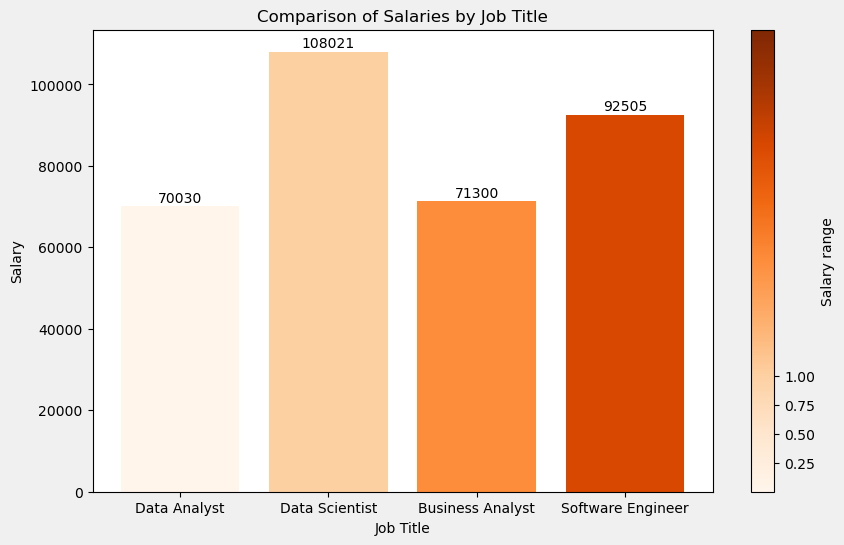

In [352]:
labels = ['Data Analyst', 'Data Scientist', 'Business Analyst', 'Software Engineer']
values = [data_analyst_salary['Salary'].values[0],
          data_scientist_salary['Salary'].values[0],
          business_analyst_salary['Salary'].values[0],
          software_engineer_salary['Salary'].values[0]]

# Define the colors for the gradient
color_range = ['#0092C7', '#00BFF3', '#90E0EF', '#FFC300', '#FF5733']
color_scale = np.linspace(0, 1, len(values) + 1)

# Create the chart
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))

# Add the gradient bars
for i, (label, value) in enumerate(zip(labels, values)):
    color = plt.cm.colors.to_hex(plt.cm.Oranges(color_scale[i]))
    ax.bar(label, value, color=color)

# Add values on top of bars
for i, v in enumerate(values):
    ax.text(i, v + 1000, str(v), ha='center', fontsize=10)

# Add title and labels
ax.set_title('Comparison of Salaries by Job Title')
ax.set_xlabel('Job Title')
ax.set_ylabel('Salary')

# Set the color range as the legend
sm = plt.cm.ScalarMappable(cmap=plt.cm.Oranges, norm=plt.Normalize(vmin=0, vmax=len(values)))
sm.set_array([])
fig.colorbar(sm, ticks=color_scale[1:], label='Salary range')

plt.show()


In [221]:
salaries = [70030, 71300, 92505, 108021]
max_salary = max(salaries)
min_salary = min(salaries)
avg_salary = sum(salaries) / len(salaries)

print("The highest salary is:", max_salary)
print("The lowest salary is:", min_salary)
print("The average salary is:", avg_salary)

The highest salary is: 108021
The lowest salary is: 70030
The average salary is: 85464.0


In [230]:
# Create a DataFrame with the salary data
salaries = pd.DataFrame({'Name': ['Data Analyst', 'Business Analyst', 'Software Enigneer', 'Data Scientist'],
                         'Salary': [70030, 71300, 92505, 108021]})

def highlight_max_min(s):
    '''
    highlight the maximum and minimum in a Series yellow.
    '''
    max_val = s.max()
    min_val = s.min()
    is_max = s == max_val
    is_min = s == min_val
    return ['background-color: green' if x else 'background-color: red' if y else '' for x,y in zip(is_max, is_min)]

# Apply the function to the Salary column of the DataFrame
highlighted_salaries = salaries.style.apply(highlight_max_min, subset=['Salary'])

# Set the width of the table
table_styles = [{'selector': 'table', 'props': [('width', '500px')]}]
highlighted_salaries.set_table_styles(table_styles)


,Name,Salary
0,Data Analyst,70030
1,Business Analyst,71300
2,Software Enigneer,92505
3,Data Scientist,108021
